## Time-series based analysis of Earthquake Risk Factors

### Part 2: Cleaning the imported data and doing a brief EDA for early assessment. Finally pickling the merged dataframe into a global dataframe.

In this notebook, I cleaned the imported API dataframe and saved it as a clean version into "../datasets" folder for further processing.

Importing the required libraries:

- Built a general function to read USGS APIs: "get_EQ_USGS.py"

In [7]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Importing the built function, prior to that added the assets path to the system path

import sys
# inserting the parent directory into current path
sys.path.insert(1, '../assets')

from EQ_USGS import clean_EQ_USGS_df

import pickle

import glob
import os

In [8]:
path = '../datasets/'

my_files = []

for file in sorted(os.listdir(path)):
    if file.endswith("raw.csv"):
        my_files.append(path+file)

In [9]:
#Source: https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
df_combined = pd.concat([pd.read_csv(f) for f in my_files ])

df_combined.reset_index(drop=True, inplace=True)

In [10]:
df_combined.shape

(262168, 31)

In [11]:
df_combined.head(1)

,Unnamed: 0,mag,place,time,updated,tz,url,detail,felt,cdi,...,dmin,rms,gap,magType,type,title,index,type.1,coordinates,index.1
0,0,2.86,"13km W of Morongo Valley, CA",13012159670,1454030351090,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,NaN,...,0.5424,0.52,180.0,ml,earthquake,"M 2.9 - 13km W of Morongo Valley, CA",0,Point,"[-116.7255, 34.0461667, 6]",0


In [12]:
df_combined_clean = clean_EQ_USGS_df(df_combined)

file_path = "../datasets/" + "combined_eq_california" + "_clean" + ".csv"
df_combined_clean.to_csv(file_path)

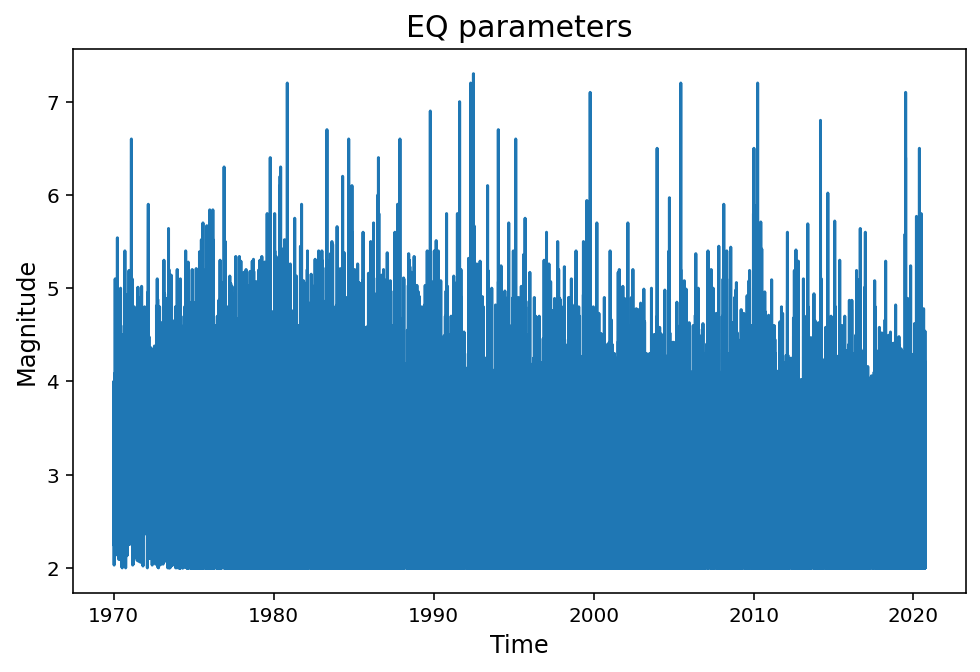

In [13]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.plot(df_combined_clean.time,df_combined_clean.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Time", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In [13]:
print("Hello World!")

Hello World!
